<a href="https://colab.research.google.com/github/MrSmont/TdG-SantiagoMontoya/blob/main/TesingDLyML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
os.chdir("/content/drive/MyDrive")

In [ ]:
sesion1=pd.read_csv('emg_pca_sesion1.csv',encoding='latin-1')
sesion2=pd.read_csv('emg_pca_sesion2.csv',encoding='latin-1')
sesion3=pd.read_csv('emg_pca_sesion3.csv',encoding='latin-1')
sesion_combined=pd.concat([sesion1,sesion2,sesion3]);

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2244 - loss: 2.3312 - val_accuracy: 0.3801 - val_loss: 1.5742
Epoch 2/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6707 - loss: 1.2129 - val_accuracy: 0.4057 - val_loss: 1.4559
Epoch 3/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8883 - loss: 0.8290 - val_accuracy: 0.3998 - val_loss: 1.5800
Epoch 4/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9691 - loss: 0.6045 - val_accuracy: 0.3975 - val_loss: 1.8022
Epoch 5/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9956 - loss: 0.4382 - val_accuracy: 0.3938 - val_loss: 2.0931
Epoch 6/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9992 - loss: 0.3098 - val_accuracy: 0.3910 - val_loss: 2.4205
Epoch 7/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9995 - loss: 0.2123 - val_accuracy: 0.3902 - val_loss: 2.7782
Epoch 8/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9998 - loss: 0.1418 - val_accuracy: 0.3894 - val_

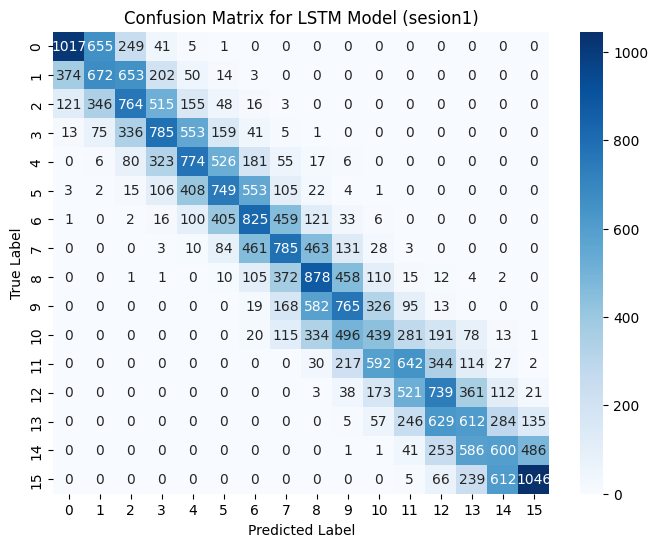


Classification Report (sesion1):
              precision    recall  f1-score   support

           0       0.67      0.52      0.58      1968
           1       0.38      0.34      0.36      1968
           2       0.36      0.39      0.38      1968
           3       0.39      0.40      0.40      1968
           4       0.38      0.39      0.38      1968
           5       0.38      0.38      0.38      1968
           6       0.37      0.42      0.39      1968
           7       0.38      0.40      0.39      1968
           8       0.36      0.45      0.40      1968
           9       0.36      0.39      0.37      1968
          10       0.25      0.22      0.24      1968
          11       0.35      0.33      0.34      1968
          12       0.33      0.38      0.35      1968
          13       0.31      0.31      0.31      1968
          14       0.36      0.30      0.33      1968
          15       0.62      0.53      0.57      1968

    accuracy                           0.38   

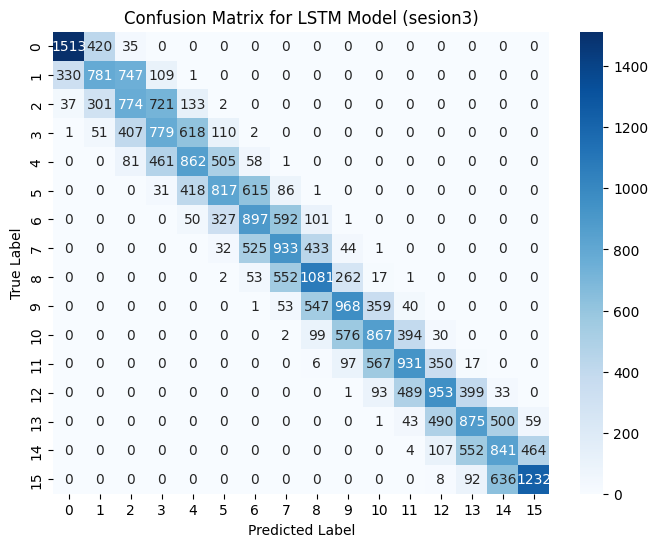


Classification Report (sesion3):
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1968
           1       0.50      0.40      0.44      1968
           2       0.38      0.39      0.39      1968
           3       0.37      0.40      0.38      1968
           4       0.41      0.44      0.43      1968
           5       0.46      0.42      0.43      1968
           6       0.42      0.46      0.44      1968
           7       0.42      0.47      0.45      1968
           8       0.48      0.55      0.51      1968
           9       0.50      0.49      0.49      1968
          10       0.46      0.44      0.45      1968
          11       0.49      0.47      0.48      1968
          12       0.49      0.48      0.49      1968
          13       0.45      0.44      0.45      1968
          14       0.42      0.43      0.42      1968
          15       0.70      0.63      0.66      1968

    accuracy                           0.48   

In [ ]:

# --- Prepare training data (sesion2) ---
X_train = sesion2.iloc[:, :6]
y_train = sesion2.iloc[:, 6]
y_train = y_train - 1

# --- Prepare test data (sesion1 and sesion3) ---
X_test_sesion1 = sesion1.iloc[:, :6]
y_test_sesion1 = sesion1.iloc[:, 6]
y_test_sesion1 = y_test_sesion1 - 1

X_test_sesion3 = sesion3.iloc[:, :6]
y_test_sesion3 = sesion3.iloc[:, 6]
y_test_sesion3 = y_test_sesion3 - 1

# --- a. Encode Labels ---
encoder = LabelEncoder()
# Fit encoder on all labels to ensure consistent encoding
all_labels = np.concatenate([y_train, y_test_sesion1, y_test_sesion3])
encoder.fit(all_labels)

# Transform and convert to categorical
y_train_encoded = encoder.transform(y_train)
y_train_cat = to_categorical(y_train_encoded)

y_test_sesion1_encoded = encoder.transform(y_test_sesion1)
y_test_sesion1_cat = to_categorical(y_test_sesion1_encoded)

y_test_sesion3_encoded = encoder.transform(y_test_sesion3)
y_test_sesion3_cat = to_categorical(y_test_sesion3_encoded)

# --- Reshape for LSTM [samples, timesteps, features] ---
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_sesion1_reshaped = X_test_sesion1.values.reshape(X_test_sesion1.shape[0], 1, X_test_sesion1.shape[1])
X_test_sesion3_reshaped = X_test_sesion3.values.reshape(X_test_sesion3.shape[0], 1, X_test_sesion3.shape[1])

# --- Build LSTM Model ---
num_classes = len(encoder.classes_)
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[1])))  # Input LSTM layer
model.add(Dense(num_classes, activation='softmax'))      # Output layer

# --- Compile Model ---
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# --- Train Model ---
history = model.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_sesion1_reshaped, y_test_sesion1_cat),
    verbose=1
)

# --- Evaluate Model on Session 1 ---
_, accuracy_sesion1 = model.evaluate(X_test_sesion1_reshaped, y_test_sesion1_cat, verbose=0)
print('Accuracy on Session 1: %.2f%%' % (accuracy_sesion1*100))

# --- Evaluate Model on Session 3 ---
_, accuracy_sesion3 = model.evaluate(X_test_sesion3_reshaped, y_test_sesion3_cat, verbose=0)
print('Accuracy on Session 3: %.2f%%' % (accuracy_sesion3*100))

# --- Generate predictions for confusion matrices ---
y_pred_sesion1 = model.predict(X_test_sesion1_reshaped)
y_pred_sesion1_classes = np.argmax(y_pred_sesion1, axis=1)
y_test_sesion1_classes = np.argmax(y_test_sesion1_cat, axis=1)

y_pred_sesion3 = model.predict(X_test_sesion3_reshaped)
y_pred_sesion3_classes = np.argmax(y_pred_sesion3, axis=1)
y_test_sesion3_classes = np.argmax(y_test_sesion3_cat, axis=1)

# --- Create confusion matrices ---
cm_sesion1 = confusion_matrix(y_test_sesion1_classes, y_pred_sesion1_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sesion1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model (sesion1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (sesion1):")
print(classification_report(y_test_sesion1_classes, y_pred_sesion1_classes))

cm_sesion3 = confusion_matrix(y_test_sesion3_classes, y_pred_sesion3_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sesion3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model (sesion3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (sesion3):")
print(classification_report(y_test_sesion3_classes, y_pred_sesion3_classes))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2222 - loss: 2.3181 - val_accuracy: 0.3146 - val_loss: 1.7075
Epoch 2/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6892 - loss: 1.2055 - val_accuracy: 0.3161 - val_loss: 1.8137
Epoch 3/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9054 - loss: 0.8374 - val_accuracy: 0.3116 - val_loss: 2.1464
Epoch 4/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9710 - loss: 0.6085 - val_accuracy: 0.3035 - val_loss: 2.5963
Epoch 5/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.4429 - val_accuracy: 0.2992 - val_loss: 3.1196
Epoch 6/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.3161 - val_accuracy: 0.2967 - val_loss: 3.6692
Epoch 7/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 0.2194 - val_accuracy: 0.2946 - val_loss: 4.2379
Epoch 8/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 0.1493 - val_accuracy: 0.2940 - val_

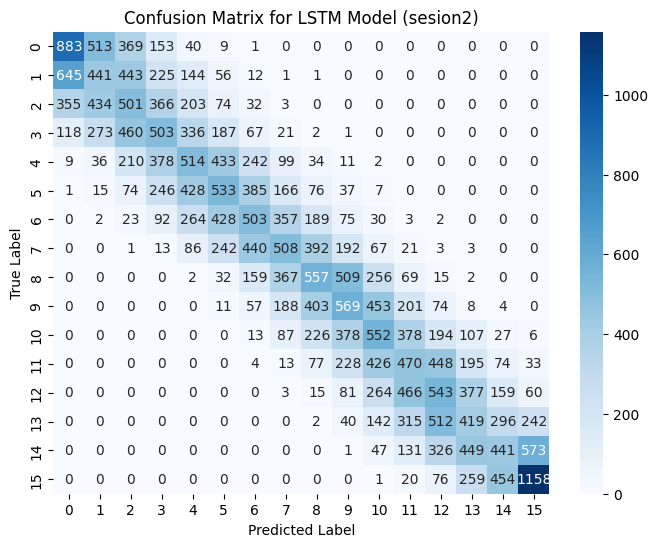


Classification Report (sesion2):
              precision    recall  f1-score   support

           0       0.44      0.45      0.44      1968
           1       0.26      0.22      0.24      1968
           2       0.24      0.25      0.25      1968
           3       0.25      0.26      0.26      1968
           4       0.25      0.26      0.26      1968
           5       0.27      0.27      0.27      1968
           6       0.26      0.26      0.26      1968
           7       0.28      0.26      0.27      1968
           8       0.28      0.28      0.28      1968
           9       0.27      0.29      0.28      1968
          10       0.25      0.28      0.26      1968
          11       0.23      0.24      0.23      1968
          12       0.25      0.28      0.26      1968
          13       0.23      0.21      0.22      1968
          14       0.30      0.22      0.26      1968
          15       0.56      0.59      0.57      1968

    accuracy                           0.29   

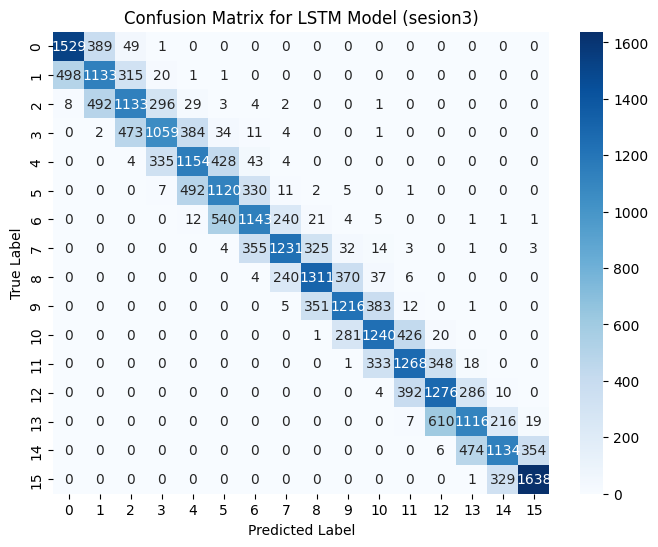


Classification Report (sesion3):
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1968
           1       0.56      0.58      0.57      1968
           2       0.57      0.58      0.57      1968
           3       0.62      0.54      0.57      1968
           4       0.56      0.59      0.57      1968
           5       0.53      0.57      0.55      1968
           6       0.60      0.58      0.59      1968
           7       0.71      0.63      0.66      1968
           8       0.65      0.67      0.66      1968
           9       0.64      0.62      0.63      1968
          10       0.61      0.63      0.62      1968
          11       0.60      0.64      0.62      1968
          12       0.56      0.65      0.60      1968
          13       0.59      0.57      0.58      1968
          14       0.67      0.58      0.62      1968
          15       0.81      0.83      0.82      1968

    accuracy                           0.63   

In [ ]:

# --- Prepare training data (sesion1) ---
X_train = sesion1.iloc[:, :6]
y_train = sesion1.iloc[:, 6]
y_train = y_train - 1  # Adjusting labels

# --- Prepare test data (sesion2 and sesion3) ---
X_test_sesion2 = sesion2.iloc[:, :6]
y_test_sesion2 = sesion2.iloc[:, 6]
y_test_sesion2 = y_test_sesion2 - 1

X_test_sesion3 = sesion3.iloc[:, :6]
y_test_sesion3 = sesion3.iloc[:, 6]
y_test_sesion3 = y_test_sesion3 - 1

# --- a. Encode Labels ---
encoder = LabelEncoder()
# Fit encoder on all labels to ensure consistent encoding
all_labels = np.concatenate([y_train, y_test_sesion2, y_test_sesion3])
encoder.fit(all_labels)

# Transform and convert to categorical
y_train_encoded = encoder.transform(y_train)
y_train_cat = to_categorical(y_train_encoded)

y_test_sesion2_encoded = encoder.transform(y_test_sesion2)
y_test_sesion2_cat = to_categorical(y_test_sesion2_encoded)

y_test_sesion3_encoded = encoder.transform(y_test_sesion3)
y_test_sesion3_cat = to_categorical(y_test_sesion3_encoded)

# --- Reshape for LSTM [samples, timesteps, features] ---
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_sesion2_reshaped = X_test_sesion2.values.reshape(X_test_sesion2.shape[0], 1, X_test_sesion2.shape[1])
X_test_sesion3_reshaped = X_test_sesion3.values.reshape(X_test_sesion3.shape[0], 1, X_test_sesion3.shape[1])

# --- Build LSTM Model ---
num_classes = len(encoder.classes_)
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[1])))  # Input LSTM layer
model.add(Dense(num_classes, activation='softmax'))      # Output layer

# --- Compile Model ---
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# --- Train Model ---
history = model.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_sesion2_reshaped, y_test_sesion2_cat),
    verbose=1
)

# --- Evaluate Model on Session 2 ---
_, accuracy_sesion2 = model.evaluate(X_test_sesion2_reshaped, y_test_sesion2_cat, verbose=0)
print('Accuracy on Session 2: %.2f%%' % (accuracy_sesion2*100))

# --- Evaluate Model on Session 3 ---
_, accuracy_sesion3 = model.evaluate(X_test_sesion3_reshaped, y_test_sesion3_cat, verbose=0)
print('Accuracy on Session 3: %.2f%%' % (accuracy_sesion3*100))

# --- Generate predictions for confusion matrices ---
y_pred_sesion2 = model.predict(X_test_sesion2_reshaped)
y_pred_sesion2_classes = np.argmax(y_pred_sesion2, axis=1)
y_test_sesion2_classes = np.argmax(y_test_sesion2_cat, axis=1)

y_pred_sesion3 = model.predict(X_test_sesion3_reshaped)
y_pred_sesion3_classes = np.argmax(y_pred_sesion3, axis=1)
y_test_sesion3_classes = np.argmax(y_test_sesion3_cat, axis=1)

# --- Create confusion matrices ---
cm_sesion2 = confusion_matrix(y_test_sesion2_classes, y_pred_sesion2_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sesion2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model (sesion2)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (sesion2):")
print(classification_report(y_test_sesion2_classes, y_pred_sesion2_classes))

cm_sesion3 = confusion_matrix(y_test_sesion3_classes, y_pred_sesion3_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sesion3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model (sesion3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (sesion3):")
print(classification_report(y_test_sesion3_classes, y_pred_sesion3_classes))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


984/984 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2207 - loss: 2.3100 - val_accuracy: 0.5016 - val_loss: 1.4277
Epoch 2/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6632 - loss: 1.2261 - val_accuracy: 0.6382 - val_loss: 1.0524
Epoch 3/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8789 - loss: 0.8525 - val_accuracy: 0.6855 - val_loss: 0.8816
Epoch 4/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9693 - loss: 0.6252 - val_accuracy: 0.6992 - val_loss: 0.7862
Epoch 5/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9913 - loss: 0.4514 - val_accuracy: 0.7030 - val_loss: 0.7446
Epoch 6/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9983 - loss: 0.3187 - val_accuracy: 0.7141 - val_loss: 0.7268
Epoch 7/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9999 - loss: 0.2182 - val_accuracy: 0.7122 - val_loss: 0.7433
Epoch 8/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 1.0000 - loss: 0.1455 - val_accuracy: 0.7099 - val

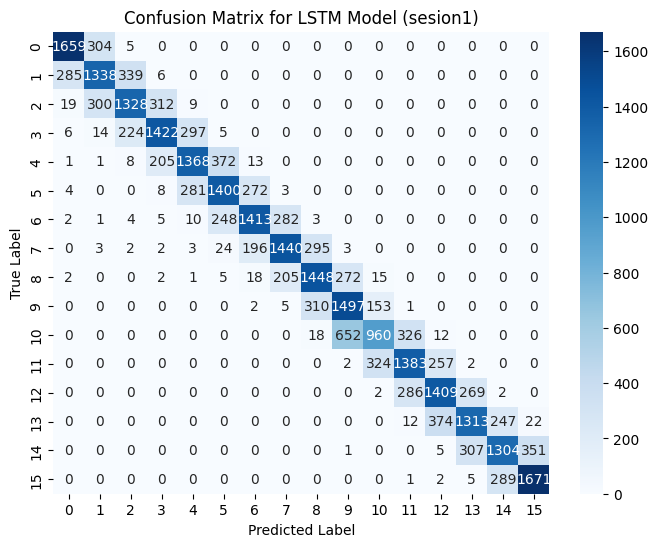


Classification Report (sesion1):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1968
           1       0.68      0.68      0.68      1968
           2       0.70      0.67      0.68      1968
           3       0.72      0.72      0.72      1968
           4       0.69      0.70      0.69      1968
           5       0.68      0.71      0.70      1968
           6       0.74      0.72      0.73      1968
           7       0.74      0.73      0.74      1968
           8       0.70      0.74      0.72      1968
           9       0.62      0.76      0.68      1968
          10       0.66      0.49      0.56      1968
          11       0.69      0.70      0.70      1968
          12       0.68      0.72      0.70      1968
          13       0.69      0.67      0.68      1968
          14       0.71      0.66      0.68      1968
          15       0.82      0.85      0.83      1968

    accuracy                           0.71   

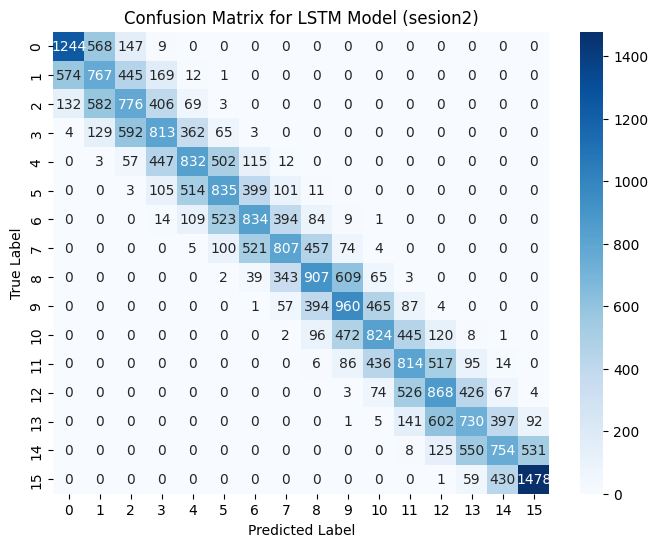


Classification Report (sesion2):
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1968
           1       0.37      0.39      0.38      1968
           2       0.38      0.39      0.39      1968
           3       0.41      0.41      0.41      1968
           4       0.44      0.42      0.43      1968
           5       0.41      0.42      0.42      1968
           6       0.44      0.42      0.43      1968
           7       0.47      0.41      0.44      1968
           8       0.46      0.46      0.46      1968
           9       0.43      0.49      0.46      1968
          10       0.44      0.42      0.43      1968
          11       0.40      0.41      0.41      1968
          12       0.39      0.44      0.41      1968
          13       0.39      0.37      0.38      1968
          14       0.45      0.38      0.42      1968
          15       0.70      0.75      0.73      1968

    accuracy                           0.45   

In [ ]:
X_train = sesion3.iloc[:, :6]
y_train = sesion3.iloc[:, 6]
y_train = y_train - 1  # Adjusting labels

# --- Prepare test data (sesion1 and sesion2) ---
X_test_sesion1 = sesion1.iloc[:, :6]
y_test_sesion1 = sesion1.iloc[:, 6]
y_test_sesion1 = y_test_sesion1 - 1

X_test_sesion2 = sesion2.iloc[:, :6]
y_test_sesion2 = sesion2.iloc[:, 6]
y_test_sesion2 = y_test_sesion2 - 1

# --- a. Encode Labels ---
encoder = LabelEncoder()
# Fit encoder on all labels to ensure consistent encoding
all_labels = np.concatenate([y_train, y_test_sesion1, y_test_sesion2])
encoder.fit(all_labels)

# Transform and convert to categorical
y_train_encoded = encoder.transform(y_train)
y_train_cat = to_categorical(y_train_encoded)

y_test_sesion1_encoded = encoder.transform(y_test_sesion1)
y_test_sesion1_cat = to_categorical(y_test_sesion1_encoded)

y_test_sesion2_encoded = encoder.transform(y_test_sesion2)
y_test_sesion2_cat = to_categorical(y_test_sesion2_encoded)

# --- Reshape for LSTM [samples, timesteps, features] ---
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_sesion1_reshaped = X_test_sesion1.values.reshape(X_test_sesion1.shape[0], 1, X_test_sesion1.shape[1])
X_test_sesion2_reshaped = X_test_sesion2.values.reshape(X_test_sesion2.shape[0], 1, X_test_sesion2.shape[1])

# --- Build LSTM Model ---
num_classes = len(encoder.classes_)
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[1])))  # Input LSTM layer
model.add(Dense(num_classes, activation='softmax'))      # Output layer

# --- Compile Model ---
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# --- Train Model ---
history = model.fit(
    X_train_reshaped,
    y_train_cat,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_sesion1_reshaped, y_test_sesion1_cat),  # Using session1 as validation during training
    verbose=1
)

# --- Evaluate Model on Session 1 ---
_, accuracy_sesion1 = model.evaluate(X_test_sesion1_reshaped, y_test_sesion1_cat, verbose=0)
print('Accuracy on Session 1: %.2f%%' % (accuracy_sesion1*100))

# --- Evaluate Model on Session 2 ---
_, accuracy_sesion2 = model.evaluate(X_test_sesion2_reshaped, y_test_sesion2_cat, verbose=0)
print('Accuracy on Session 2: %.2f%%' % (accuracy_sesion2*100))

# --- Generate predictions for confusion matrices ---
y_pred_sesion1 = model.predict(X_test_sesion1_reshaped)
y_pred_sesion1_classes = np.argmax(y_pred_sesion1, axis=1)
y_test_sesion1_classes = np.argmax(y_test_sesion1_cat, axis=1)

y_pred_sesion2 = model.predict(X_test_sesion2_reshaped)
y_pred_sesion2_classes = np.argmax(y_pred_sesion2, axis=1)
y_test_sesion2_classes = np.argmax(y_test_sesion2_cat, axis=1)

# --- Create confusion matrices ---
cm_sesion1 = confusion_matrix(y_test_sesion1_classes, y_pred_sesion1_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sesion1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model (sesion1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (sesion1):")
print(classification_report(y_test_sesion1_classes, y_pred_sesion1_classes))

cm_sesion2 = confusion_matrix(y_test_sesion2_classes, y_pred_sesion2_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sesion2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model (sesion2)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report (sesion2):")
print(classification_report(y_test_sesion2_classes, y_pred_sesion2_classes))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2362/2362 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3360 - loss: 1.9664 - val_accuracy: 0.6651 - val_loss: 1.0163
Epoch 2/20
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6770 - loss: 0.9531 - val_accuracy: 0.7081 - val_loss: 0.8378
Epoch 3/20
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7133 - loss: 0.8136 - val_accuracy: 0.7173 - val_loss: 0.7746
Epoch 4/20
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7260 - loss: 0.7498 - val_accuracy: 0.7214 - val_loss: 0.7274
Epoch 5/20
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7342 - loss: 0.7050 - val_accuracy: 0.7346 - val_loss: 0.6843
Epoch 6/20
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7432 - loss: 0.6633 - val_accuracy: 0.7445 - val_loss: 0.6466
Epoch 7/20
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7505 - loss: 0.6277 - val_accuracy: 0.7514 - val_loss: 0.6146
Epoch 8/20
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7564 - loss: 0.6015 - val_

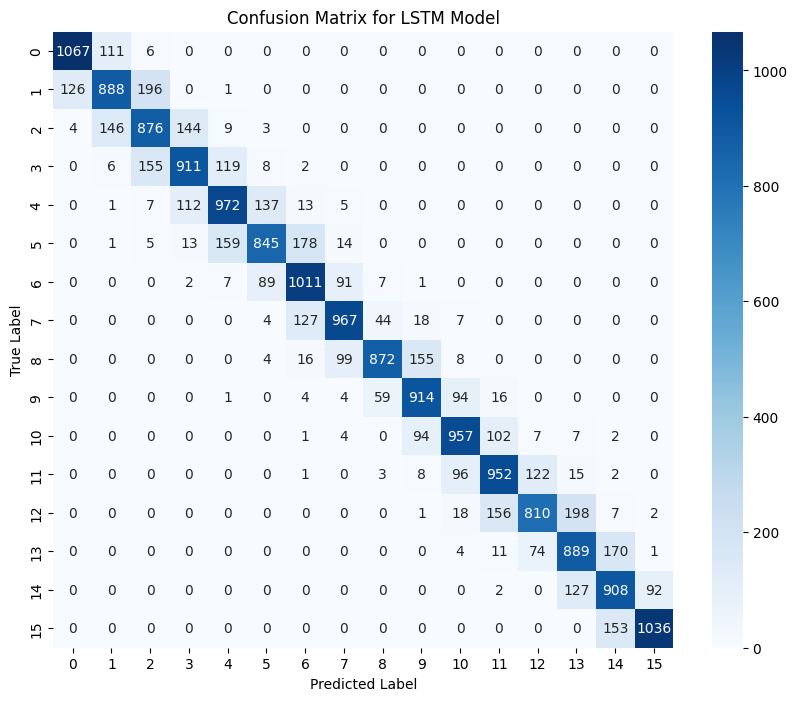


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1184
           1       0.77      0.73      0.75      1211
           2       0.70      0.74      0.72      1182
           3       0.77      0.76      0.76      1201
           4       0.77      0.78      0.77      1247
           5       0.78      0.70      0.73      1215
           6       0.75      0.84      0.79      1208
           7       0.82      0.83      0.82      1167
           8       0.89      0.76      0.82      1154
           9       0.77      0.84      0.80      1092
          10       0.81      0.82      0.81      1174
          11       0.77      0.79      0.78      1199
          12       0.80      0.68      0.73      1192
          13       0.72      0.77      0.75      1149
          14       0.73      0.80      0.77      1129
          15       0.92      0.87      0.89      1189

    accuracy                           0.79     18893
  

In [ ]:
X = sesion_combined.iloc[:, :-1]
y = sesion_combined.iloc[:, -1] - 1  # Adjust labels

# a. Encode Labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# b. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c. Reshape for LSTM [samples, timesteps, features]
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# 2. Build LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]))) # Input LSTM layer
model.add(Dense(y.shape[1], activation='softmax')) # Output layer

# 3. Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 5. Evaluate Model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Create Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LSTM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print Classification Report for additional details
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))


Session 2 Test Accuracy: 0.30

Classification Report (Session 2):
              precision    recall  f1-score   support

           0       0.45      0.47      0.46      1968
           1       0.27      0.23      0.25      1968
           2       0.24      0.25      0.25      1968
           3       0.26      0.27      0.27      1968
           4       0.27      0.27      0.27      1968
           5       0.28      0.27      0.27      1968
           6       0.26      0.24      0.25      1968
           7       0.28      0.29      0.28      1968
           8       0.31      0.32      0.31      1968
           9       0.28      0.31      0.29      1968
          10       0.31      0.31      0.31      1968
          11       0.23      0.27      0.25      1968
          12       0.27      0.26      0.26      1968
          13       0.24      0.22      0.23      1968
          14       0.30      0.23      0.26      1968
          15       0.57      0.59      0.58      1968

    accuracy  

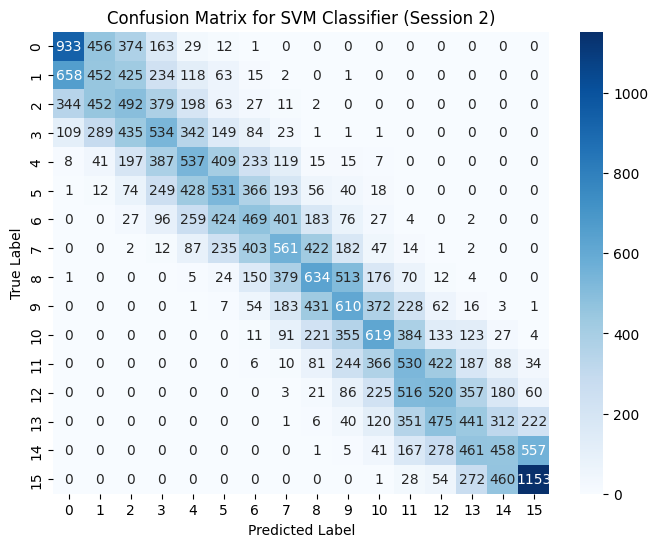

Session 3 Test Accuracy: 0.63

Classification Report (Session 3):
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1968
           1       0.57      0.59      0.58      1968
           2       0.58      0.57      0.57      1968
           3       0.63      0.56      0.59      1968
           4       0.56      0.60      0.58      1968
           5       0.54      0.55      0.55      1968
           6       0.61      0.55      0.58      1968
           7       0.67      0.65      0.66      1968
           8       0.64      0.70      0.67      1968
           9       0.68      0.61      0.64      1968
          10       0.64      0.65      0.65      1968
          11       0.60      0.69      0.64      1968
          12       0.59      0.62      0.60      1968
          13       0.57      0.56      0.57      1968
          14       0.65      0.57      0.61      1968
          15       0.82      0.82      0.82      1968

    accuracy  

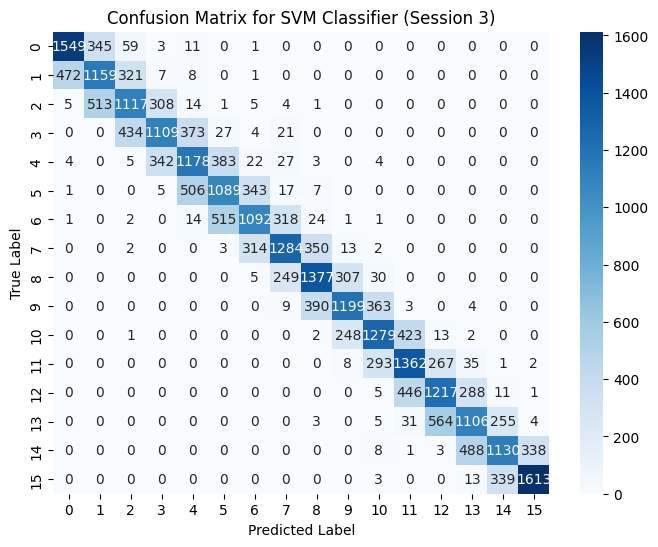

In [ ]:
X_train = sesion1.iloc[:, :6]  # First 6 columns as features
y_train = sesion1.iloc[:, 6] - 1  # 7th column as labels, subtract 1 to start from 0

# Prepare testing data (session2)
X_test_s2 = sesion2.iloc[:, :6]
y_test_s2 = sesion2.iloc[:, 6] - 1

# Prepare testing data (session3)
X_test_s3 = sesion3.iloc[:, :6]
y_test_s3 = sesion3.iloc[:, 6] - 1

# Train SVM model on session1
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Test on session2
y_pred_s2 = svm_classifier.predict(X_test_s2)
accuracy_s2 = accuracy_score(y_test_s2, y_pred_s2)
print(f"Session 2 Test Accuracy: {accuracy_s2:.2f}")
print("\nClassification Report (Session 2):")
print(classification_report(y_test_s2, y_pred_s2))

# Create confusion matrix for session2
cm_s2 = confusion_matrix(y_test_s2, y_pred_s2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_s2, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier (Session 2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Test on session3
y_pred_s3 = svm_classifier.predict(X_test_s3)
accuracy_s3 = accuracy_score(y_test_s3, y_pred_s3)
print(f"Session 3 Test Accuracy: {accuracy_s3:.2f}")
print("\nClassification Report (Session 3):")
print(classification_report(y_test_s3, y_pred_s3))

# Create confusion matrix for session3
cm_s3 = confusion_matrix(y_test_s3, y_pred_s3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_s3, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier (Session 3)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Session 1 Test Accuracy: 0.40

Classification Report (Session 1):
              precision    recall  f1-score   support

           0       0.68      0.49      0.57      1968
           1       0.37      0.36      0.37      1968
           2       0.37      0.38      0.37      1968
           3       0.40      0.40      0.40      1968
           4       0.37      0.38      0.38      1968
           5       0.38      0.40      0.39      1968
           6       0.40      0.40      0.40      1968
           7       0.39      0.43      0.41      1968
           8       0.38      0.51      0.44      1968
           9       0.37      0.37      0.37      1968
          10       0.31      0.28      0.29      1968
          11       0.35      0.36      0.35      1968
          12       0.36      0.37      0.36      1968
          13       0.31      0.33      0.32      1968
          14       0.38      0.32      0.35      1968
          15       0.63      0.54      0.58      1968

    accuracy  

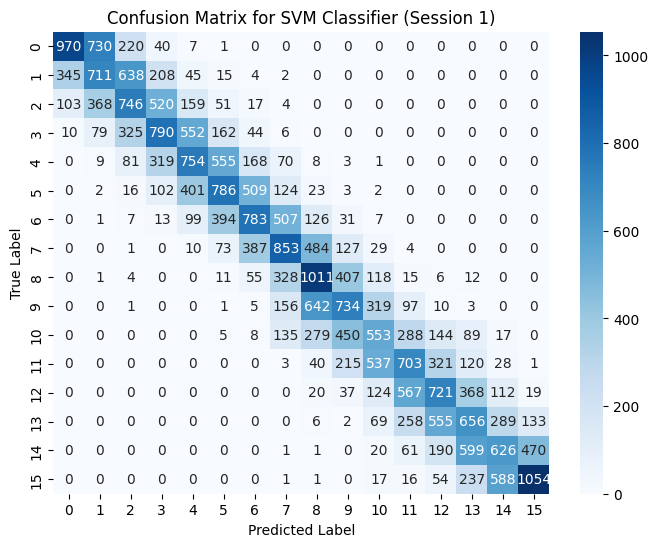

Session 3 Test Accuracy: 0.49

Classification Report (Session 3):
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1968
           1       0.49      0.40      0.44      1968
           2       0.39      0.40      0.40      1968
           3       0.37      0.40      0.39      1968
           4       0.42      0.44      0.43      1968
           5       0.46      0.42      0.44      1968
           6       0.42      0.42      0.42      1968
           7       0.41      0.49      0.45      1968
           8       0.49      0.58      0.53      1968
           9       0.53      0.49      0.51      1968
          10       0.51      0.49      0.50      1968
          11       0.50      0.53      0.51      1968
          12       0.53      0.48      0.50      1968
          13       0.45      0.46      0.45      1968
          14       0.42      0.43      0.42      1968
          15       0.71      0.62      0.66      1968

    accuracy  

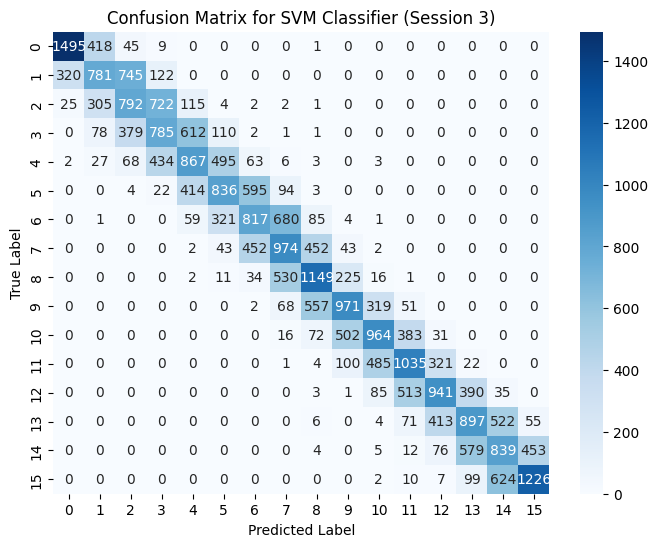

In [ ]:
# Prepare training data (session2)
X_train = sesion2.iloc[:, :6]  # First 6 columns as features
y_train = sesion2.iloc[:, 6] - 1  # 7th column as labels, subtract 1 to start from 0

# Prepare testing data (session1)
X_test_s1 = sesion1.iloc[:, :6]
y_test_s1 = sesion1.iloc[:, 6] - 1

# Prepare testing data (session3)
X_test_s3 = sesion3.iloc[:, :6]
y_test_s3 = sesion3.iloc[:, 6] - 1

# Train SVM model on session2
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Test on session1
y_pred_s1 = svm_classifier.predict(X_test_s1)
accuracy_s1 = accuracy_score(y_test_s1, y_pred_s1)
print(f"Session 1 Test Accuracy: {accuracy_s1:.2f}")
print("\nClassification Report (Session 1):")
print(classification_report(y_test_s1, y_pred_s1))

# Create confusion matrix for session1
cm_s1 = confusion_matrix(y_test_s1, y_pred_s1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_s1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier (Session 1)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Test on session3
y_pred_s3 = svm_classifier.predict(X_test_s3)
accuracy_s3 = accuracy_score(y_test_s3, y_pred_s3)
print(f"Session 3 Test Accuracy: {accuracy_s3:.2f}")
print("\nClassification Report (Session 3):")
print(classification_report(y_test_s3, y_pred_s3))

# Create confusion matrix for session3
cm_s3 = confusion_matrix(y_test_s3, y_pred_s3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_s3, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier (Session 3)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Session 1 Test Accuracy: 0.71

Classification Report (Session 1):
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1968
           1       0.68      0.69      0.69      1968
           2       0.68      0.69      0.68      1968
           3       0.73      0.71      0.72      1968
           4       0.69      0.70      0.70      1968
           5       0.71      0.72      0.71      1968
           6       0.74      0.73      0.74      1968
           7       0.75      0.74      0.74      1968
           8       0.70      0.77      0.73      1968
           9       0.64      0.74      0.69      1968
          10       0.66      0.53      0.59      1968
          11       0.68      0.69      0.68      1968
          12       0.70      0.71      0.70      1968
          13       0.68      0.70      0.69      1968
          14       0.72      0.65      0.68      1968
          15       0.83      0.85      0.84      1968

    accuracy  

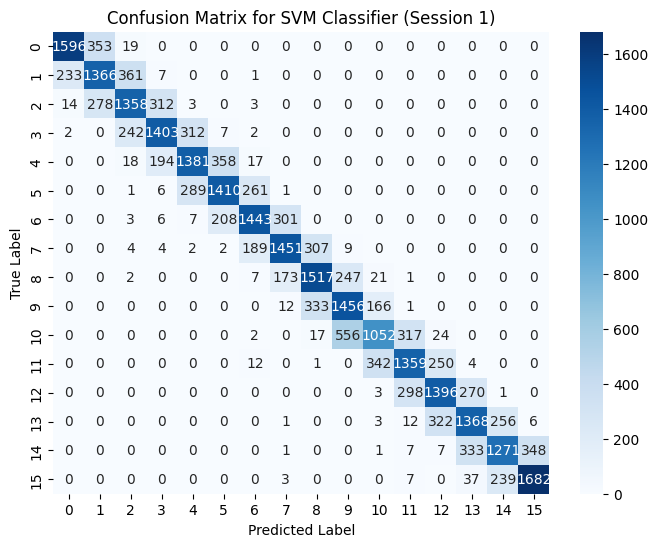

Session 2 Test Accuracy: 0.46

Classification Report (Session 2):
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1968
           1       0.38      0.40      0.39      1968
           2       0.38      0.40      0.39      1968
           3       0.42      0.42      0.42      1968
           4       0.43      0.43      0.43      1968
           5       0.42      0.41      0.41      1968
           6       0.44      0.42      0.43      1968
           7       0.46      0.42      0.44      1968
           8       0.49      0.50      0.49      1968
           9       0.45      0.50      0.47      1968
          10       0.47      0.46      0.47      1968
          11       0.42      0.43      0.43      1968
          12       0.40      0.44      0.42      1968
          13       0.39      0.38      0.39      1968
          14       0.46      0.39      0.42      1968
          15       0.70      0.73      0.72      1968

    accuracy  

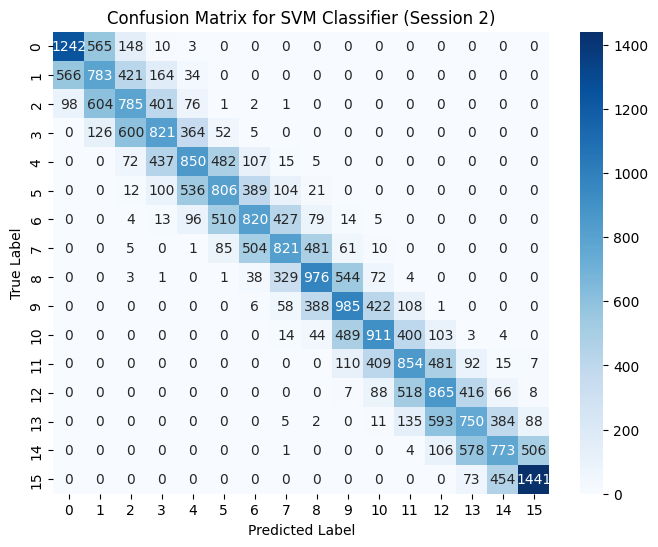

In [ ]:
# Prepare training data (session3)
X_train = sesion3.iloc[:, :6]  # First 6 columns as features
y_train = sesion3.iloc[:, 6] - 1  # 7th column as labels, subtract 1 to start from 0

# Prepare testing data (session1)
X_test_s1 = sesion1.iloc[:, :6]
y_test_s1 = sesion1.iloc[:, 6] - 1

# Prepare testing data (session2)
X_test_s2 = sesion2.iloc[:, :6]
y_test_s2 = sesion2.iloc[:, 6] - 1

# Train SVM model on session3
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Test on session1
y_pred_s1 = svm_classifier.predict(X_test_s1)
accuracy_s1 = accuracy_score(y_test_s1, y_pred_s1)
print(f"Session 1 Test Accuracy: {accuracy_s1:.2f}")
print("\nClassification Report (Session 1):")
print(classification_report(y_test_s1, y_pred_s1))

# Create confusion matrix for session1
cm_s1 = confusion_matrix(y_test_s1, y_pred_s1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_s1, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier (Session 1)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Test on session2
y_pred_s2 = svm_classifier.predict(X_test_s2)
accuracy_s2 = accuracy_score(y_test_s2, y_pred_s2)
print(f"Session 2 Test Accuracy: {accuracy_s2:.2f}")
print("\nClassification Report (Session 2):")
print(classification_report(y_test_s2, y_pred_s2))

# Create confusion matrix for session2
cm_s2 = confusion_matrix(y_test_s2, y_pred_s2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_s2, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier (Session 2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Test Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1184
           1       0.81      0.75      0.78      1211
           2       0.76      0.74      0.75      1182
           3       0.78      0.76      0.77      1201
           4       0.78      0.80      0.79      1247
           5       0.77      0.76      0.77      1215
           6       0.78      0.74      0.76      1208
           7       0.77      0.76      0.77      1167
           8       0.79      0.79      0.79      1154
           9       0.79      0.77      0.78      1092
          10       0.75      0.81      0.78      1174
          11       0.78      0.75      0.77      1199
          12       0.77      0.74      0.75      1192
          13       0.73      0.73      0.73      1149
          14       0.76      0.78      0.77      1129
          15       0.89      0.91      0.90      1189

    accuracy                        

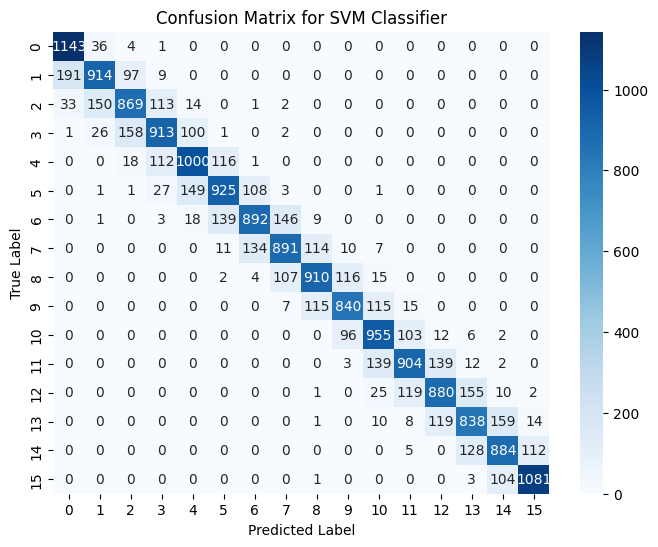

In [ ]:

# Prepare the data
X = sesion_combined.iloc[:, :-1]
y = sesion_combined.iloc[:, -1] - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Test Accuracy: 0.7854

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1184
           1       0.81      0.75      0.78      1211
           2       0.76      0.74      0.75      1182
           3       0.78      0.76      0.77      1201
           4       0.78      0.80      0.79      1247
           5       0.77      0.76      0.77      1215
           6       0.78      0.74      0.76      1208
           7       0.77      0.76      0.77      1167
           8       0.79      0.79      0.79      1154
           9       0.79      0.77      0.78      1092
          10       0.75      0.81      0.78      1174
          11       0.78      0.75      0.77      1199
          12       0.77      0.74      0.75      1192
          13       0.73      0.73      0.73      1149
          14       0.76      0.78      0.77      1129
          15       0.89      0.91      0.90      1189

    accuracy                      

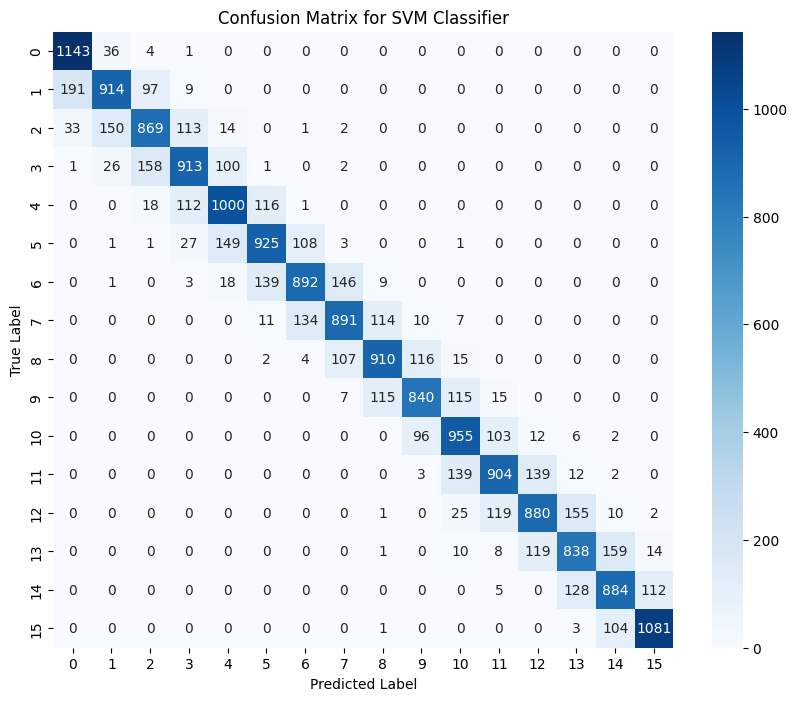

In [ ]:
X = sesion_combined.iloc[:, :6]  # First 6 columns as features
y = sesion_combined.iloc[:, 6] - 1  # 7th column as labels, subtract 1 to start from 0

# Split the combined data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model on the training portion
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Test on the testing portion
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()